## Oceanbolt Python SDK - Weekly Urea Exports from Mesaieed 

Example of Oceanbolt's Python SDK to answer the question - "What was the weekly volume exports of Fertilizers from Mesaieed since 01 Janary 2020?" 


In [22]:
# Import the relevant libraries
# In order to get a timeseries of weekly export volumes, we use the TradeFlowTimeseries client (https://python-sdk.oceanbolt.com/tradeflows_v3/timeseries.html#)

from oceanbolt.sdk.client import APIClient
from oceanbolt.sdk.data.trade_flows import TradeFlowTimeseries
from datetime import date

In [23]:
# Create the base API client using your token. Tokens can be created in the Oceanbolt App (app.oceanbolt.com)
base_client = APIClient("<token>")

In [25]:
# Connect to the relevant Oceanbolt data endpoints using the base client object, ie: TradeFlows
trade_flow_client = TradeFlowTimeseries(base_client)

In [65]:
# We apply filters to our query to get a timeseries of weekly urea exports from Mesaieed
# A complete list of available filters can be found at https://python-sdk.oceanbolt.com/tradeflows_v3/timeseries.html#arguments

df = trade_flow_client.get(
    frequency="weekly", #Specify frequency, in our case we want weekly flows
    load_port_unlocode=['QAMES'], #Specify the load port's UN/LOCODE. You can include multiple ports to do aggregate analysis. To find the UN/LOCODE of your port of interest, visit https://app.oceanbolt.com/port-tradeflows
    commodity=['urea'], #Specify the commodity or commodities
    start_date=date(2020, 1, 1), #Specify the start date as 01 Jan 2020
    end_date=date.today(), #Specify the start date as today (22 Feb 2021)
)

#Print 2 first rows of table
df = df.rename(columns={'value': 'volume, mt'})
df.head(2) #Note that as we have selected weekly frequency, 01 Jan 2020 is a Wednesday, and will be indexed with the date of the first day in that week, i.e. 30 Dec 2019

,date,"volume, mt"
0,2019-12-30,0.0
1,2020-01-06,107800.0


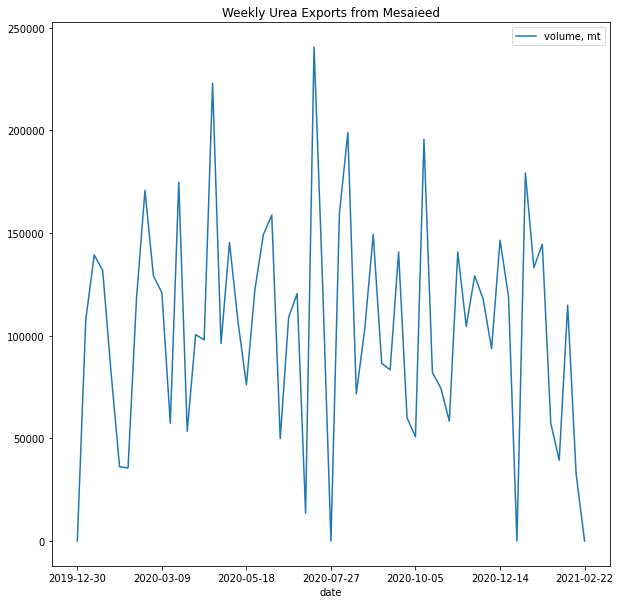

In [66]:
#Let's plot the timeseries
df.plot(x='date',figsize=(10,10), title='Weekly Urea Exports from Mesaieed');